In [85]:
import sys
import pandas as pd
import matplotlib
import scipy as sp
import IPython
from IPython import display
from IPython.display import FileLink,FileLinks
import sklearn
import random
import time
import warnings
warnings.filterwarnings('ignore')


In [86]:
import os
print(os.listdir("F:\\DataSc\\Beginner Projects\\titanic\\input"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [87]:
#used all models to test and see how they all behave with this kind of dataset.
from sklearn import svm,tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
#from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=12,8


In [88]:
data_raw=pd.read_csv('F:\\DataSc\\Beginner Projects\\titanic\\input\\train.csv')
data_val=pd.read_csv('F:\\DataSc\\Beginner Projects\\titanic\\input\\test.csv')
data1=data_raw.copy(deep= True)
data_cleaner=[data1,data_val]
data_raw.info()
#data_raw.head()
#data_raw.tail()
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


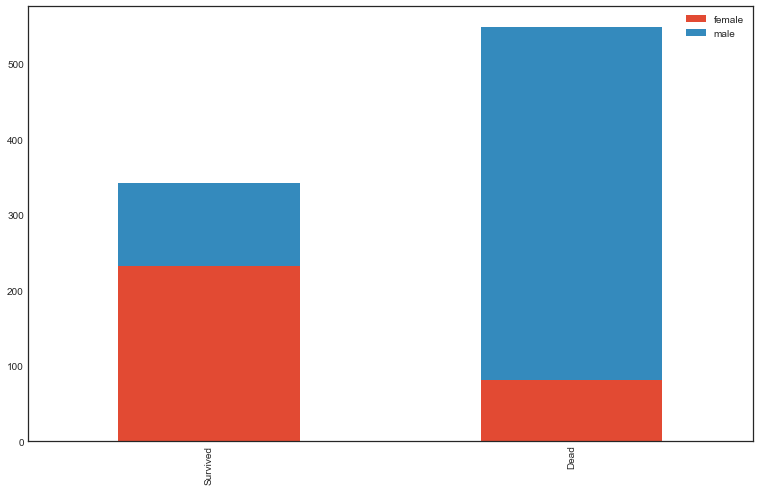

In [89]:
survived_sex = data1[data1['Survived']==1]['Sex'].value_counts()
dead_sex = data1[data1['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

In [90]:
print('Null Value in each column of Train Data:\n',data1.isnull().sum())
print('Null Value in each column of Test Data:\n',data_val.isnull().sum())
data_raw.describe(include='all')

Null Value in each column of Train Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null Value in each column of Test Data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Baxter, Mr. Quigg Edmond",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [91]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)

drop_column=['PassengerId','Cabin','Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print('_'*20)
print(data_val.isnull().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
____________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [92]:
for dataset in data_cleaner:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    dataset['IsAlone']=1
    dataset['IsAlone'].loc[dataset['FamilySize']>1]=0
    dataset['Title']=dataset['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
    dataset['FareBin']=pd.qcut(dataset['Fare'],4)
    dataset['AgeBin']=pd.cut(dataset['Age'].astype(int),5)
stat_min=10
title_names=(data1['Title'].value_counts()<stat_min)
data1['Title']=data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x]==True else x)

print(data1['Title'].value_counts)
data1.info()
data_val.info()
data1.sample(10)

<bound method IndexOpsMixin.value_counts of 0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
        ...   
861         Mr
862        Mrs
863       Miss
864         Mr
865        Mrs
866       Miss
867         Mr
868         Mr
869     Master
870         Mr
871        Mrs
872         Mr
873         Mr
874        Mrs
875       Miss
876         Mr
877         Mr
878         Mr
879        Mrs
880        Mrs
881         Mr
882       Miss
883         Mr
884         Mr
885        Mrs
886       Misc
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object>


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
246,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,7.7750,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
605,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,15.5500,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
482,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(48.0, 64.0]"
641,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,69.3000,C,1,1,Misc,"(31.0, 512.329]","(16.0, 32.0]"
601,0,3,"Slabenoff, Mr. Petco",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
329,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,57.9792,C,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(-0.08, 16.0]"
631,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,7.0542,S,1,1,Mr,"(-0.001, 7.91]","(48.0, 64.0]"
491,0,3,"Windelov, Mr. Einar",male,21.0,0,0,7.2500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


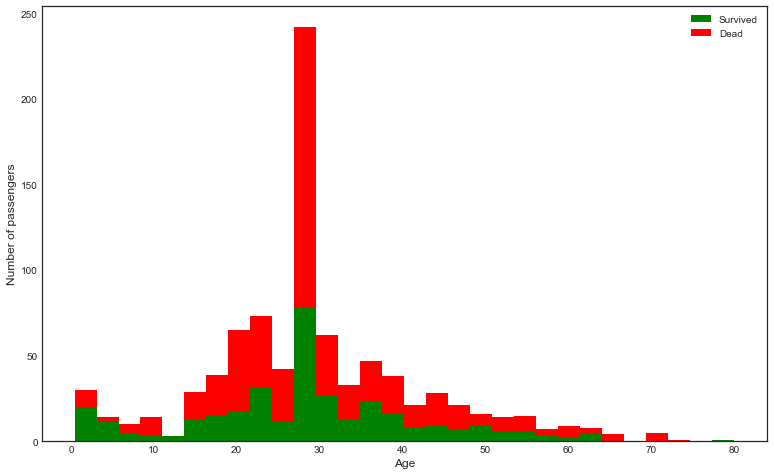

In [93]:
figure = plt.figure(figsize=(13,8))
plt.hist([data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']], stacked=True, color = ['g','r'],bins = 30,
         label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

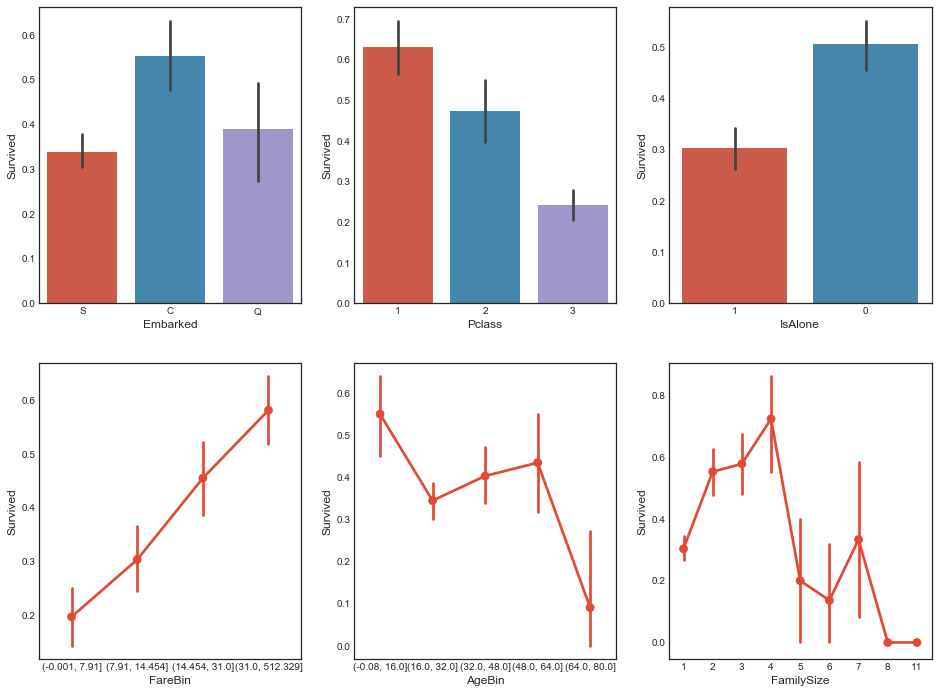

In [94]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

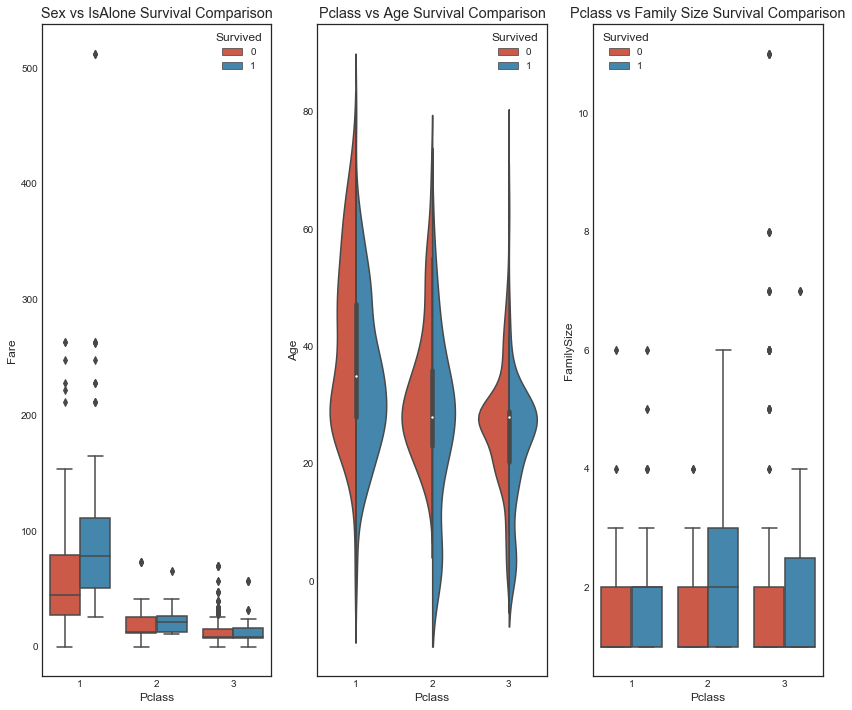

In [96]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

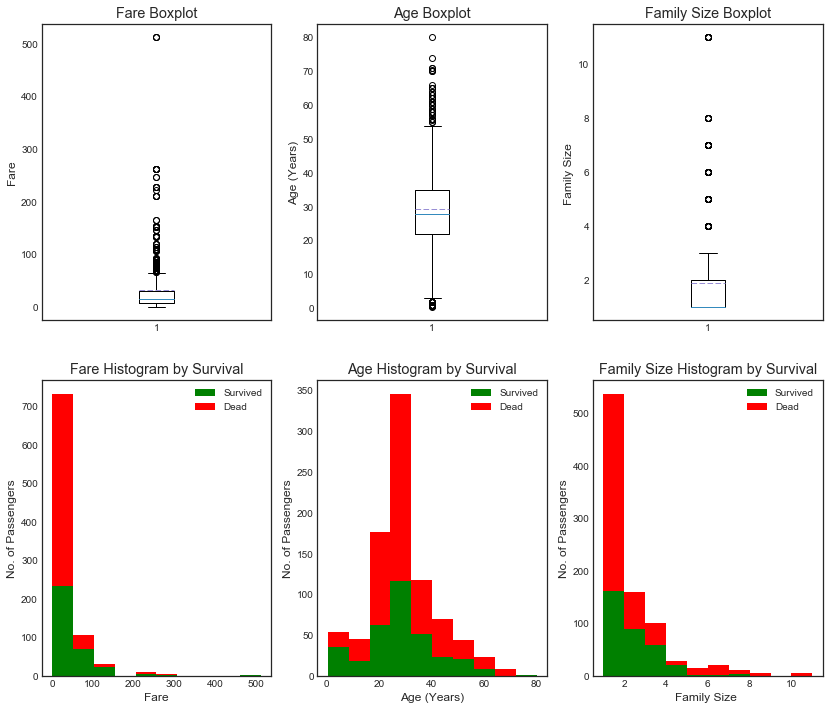

In [99]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size ')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size ')
plt.ylabel('No. of Passengers')
plt.legend()

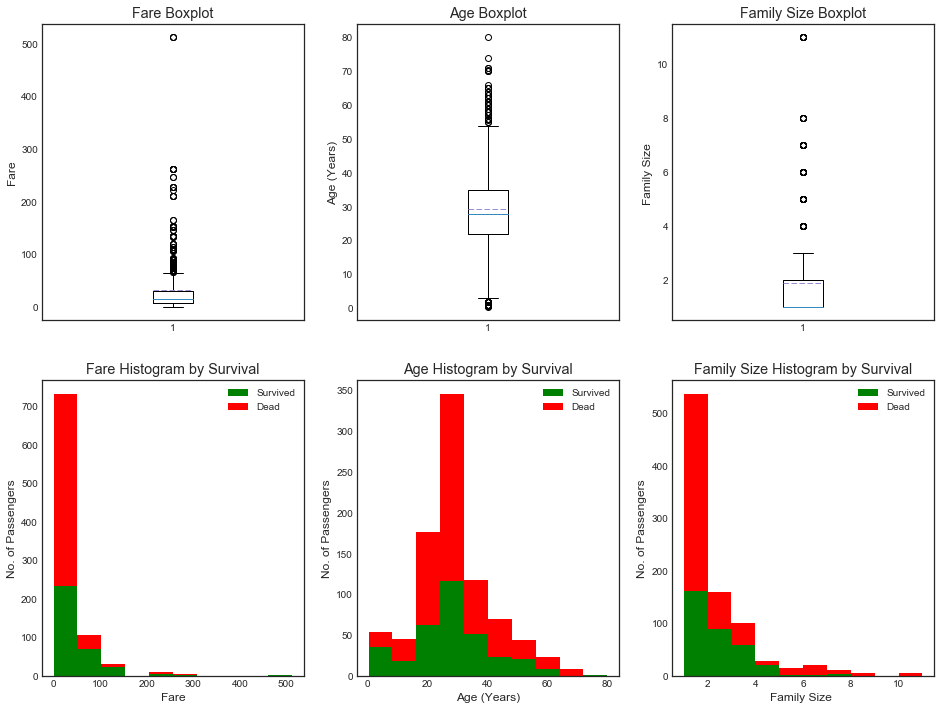

In [98]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size ')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size ')
plt.ylabel('No. of Passengers')
plt.legend()

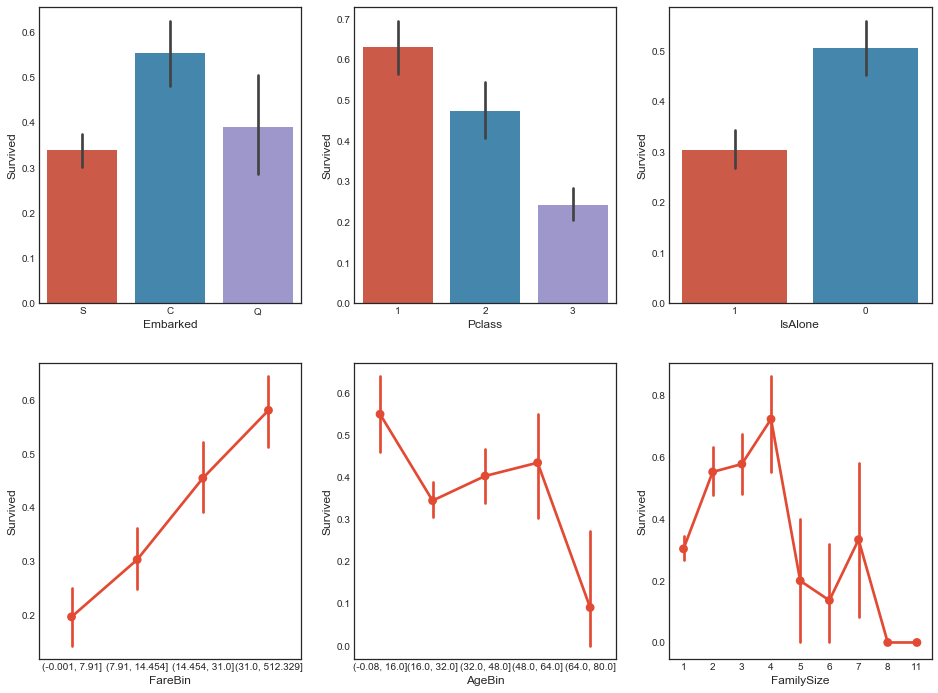

In [100]:
ig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

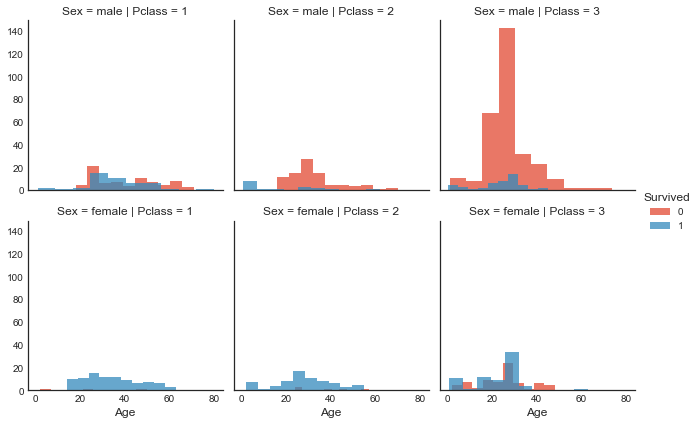

In [101]:
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

In [102]:
label=LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code']=label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code']=label.fit_transform(dataset['Embarked'])
    dataset['Title_Code']=label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code']=label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code']=label.fit_transform(dataset['FareBin'])
Target=['Survived']
data1_x=['Pclass','Sex','Age','Parch','Fare','Embarked','FamilySize','IsAlone','Title','SibSp']
data1_x_calc=['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data1_xy=Target+data1_x
print('Original X Y: ', data1_xy, '\n')
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')
data1_dummy.head()


Original X Y:  ['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'SibSp'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'Age', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'SibSp', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



,Pclass,Age,Parch,Fare,FamilySize,IsAlone,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,22.0,0,7.2500,2,0,1,0,1,0,0,1,0,0,1,0,0
1,1,38.0,0,71.2833,2,0,1,1,0,1,0,0,0,0,0,1,0
2,3,26.0,0,7.9250,1,1,0,1,0,0,0,1,0,1,0,0,0
3,1,35.0,0,53.1000,2,0,1,1,0,0,0,1,0,0,0,1,0
4,3,35.0,0,8.0500,1,1,0,0,1,0,0,1,0,0,1,0,0


In [103]:
print('Null values in train columns:\n',data1.isnull().sum())
print('*'*25)
print(data1.info())

print('Null values in test columns:\n',data_val.isnull().sum())
print('*'*25)
print(data_val.info())

data_raw.describe(include='all')

Null values in train columns:
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Baxter, Mr. Quigg Edmond",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [104]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


In [105]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
---------- 

Survival Correlation by: IsAlone
   IsAlone  Survived
0        0  0.505650
1        1  0.303538
---------- 

Survival Correlation by: Title
     Title  Survi

In [106]:
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survived    0    1
Title             
 Master    17   23
 Miss      55  127
 Mr       436   81
 Mrs       26   99
Misc       15   12


In [107]:
MLA = [
    
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    
    gaussian_process.GaussianProcessClassifier(),
    
    
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    

    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    
    neighbors.KNeighborsClassifier(),
    
    
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
       
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #this thing is refusing to work !!
    #XGBClassifier()    
    ]




cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


MLA_predict = data1[Target]


row_index = 0
for alg in MLA:

    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   
    

    
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
1,BaggingClassifier,"{'verbose': 0, 'max_features': 1.0, 'n_jobs': ...",0.891386,0.827239,0.0631347,0.0196028
14,SVC,"{'C': 1.0, 'degree': 3, 'probability': True, '...",0.839139,0.826866,0.0439856,0.0412033
15,NuSVC,"{'degree': 3, 'probability': True, 'class_weig...",0.836517,0.826119,0.0470149,0.0532023
2,ExtraTreesClassifier,"{'n_jobs': 1, 'class_weight': None, 'oob_score...",0.895131,0.823881,0.0552491,0.0168031
4,RandomForestClassifier,"{'n_jobs': 1, 'class_weight': None, 'oob_score...",0.89176,0.822015,0.0783662,0.0172015
3,GradientBoostingClassifier,"{'learning_rate': 0.1, 'n_estimators': 100, 'l...",0.867041,0.822015,0.0513097,0.0664047
17,DecisionTreeClassifier,"{'class_weight': None, 'max_leaf_nodes': None,...",0.895131,0.820896,0.0594444,0.00159812
13,KNeighborsClassifier,"{'n_jobs': 1, 'algorithm': 'auto', 'leaf_size'...",0.849625,0.819776,0.0631347,0.00240014
18,ExtraTreeClassifier,"{'class_weight': None, 'min_weight_fraction_le...",0.895131,0.81306,0.0641975,0.000800014
0,AdaBoostClassifier,"{'n_estimators': 50, 'random_state': None, 'le...",0.820599,0.810075,0.0476108,0.0840059
